In [5]:
%matplotlib inline
import numpy, scipy
from pyscf.lib import chkfile

import matplotlib as mpl
from matplotlib import pyplot as plt

params = {
        "font.size":       20,
        "axes.titlesize":  16,
        "axes.labelsize":  24,
        "legend.fontsize": 16,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "figure.subplot.wspace":0.0,
        "figure.subplot.hspace":0.0,
        "axes.spines.right": True,
        "axes.spines.top":   True,
        "xtick.direction":'in',
        "ytick.direction":'in',
        "text.usetex": True,
        "font.family": "serif",
        'text.latex.preamble': r"\usepackage{amsmath}"
}

colors = ["#016b7e", "#099da0", "#9cd8c7", "#ecdcae", "#f1a502", "#d17203", "#c44703", "#b82513", "#a6272d"]

mpl.rcParams.update(params)

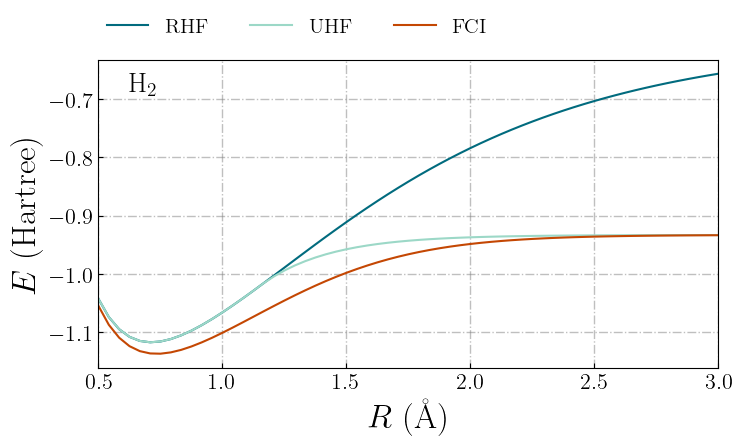

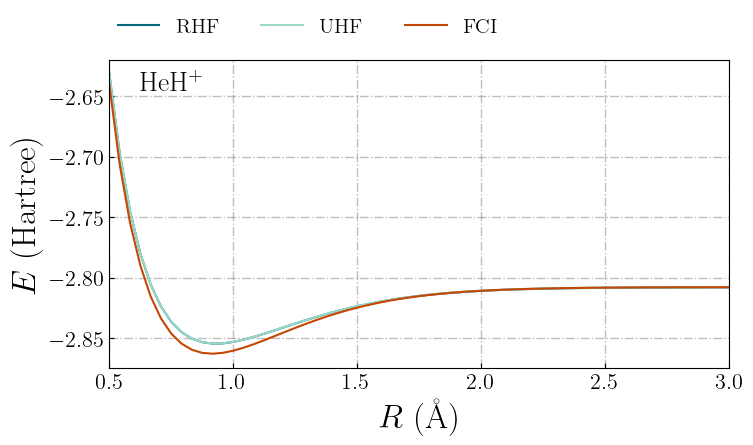

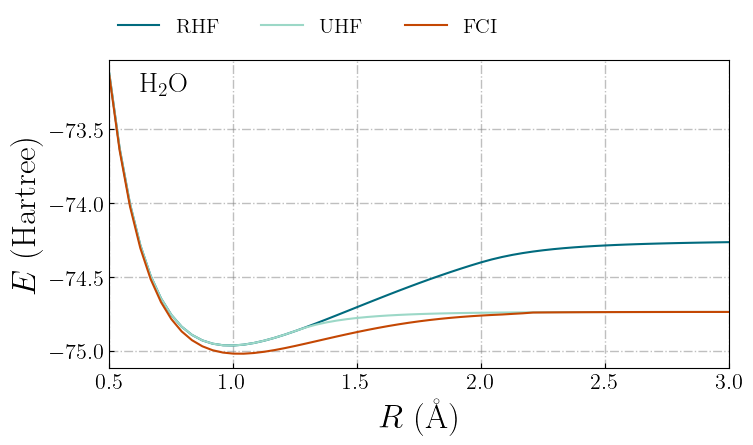

In [6]:
for mol in ['h2', 'heh+', 'h2o']:
    r_list = []
    ene_rhf_list = []
    ene_uhf_list = []
    ene_fci_list = []

    for bl in numpy.linspace(0.5, 3.0, 61):
        ene_rhf = chkfile.load(f"./{mol}/{bl:.4f}/data.h5", "ene_rhf")
        ene_uhf = chkfile.load(f"./{mol}/{bl:.4f}/data.h5", "ene_uhf")
        ene_fci = chkfile.load(f"./{mol}/{bl:.4f}/data.h5", "ene_fci")

        r_list.append(bl)
        ene_rhf_list.append(ene_rhf)
        ene_uhf_list.append(ene_uhf)
        ene_fci_list.append(ene_fci)

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(r_list, ene_rhf_list, label="RHF", color=colors[0])
    ax.plot(r_list, ene_uhf_list, label="UHF", color=colors[2])
    ax.plot(r_list, ene_fci_list, label="FCI", color=colors[6])

    ax.set_xlabel(r"$R$ (\AA)")
    ax.set_ylabel(r"$E$ (Hartree)")

    ax.grid(color='gray', linestyle='-.', linewidth=1, alpha=0.5)
    ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
            edgecolor='silver', frameon=False, fontsize=15, ncol=3)

    ax.set_xlim(0.5, 3.0)
    if mol == 'h2':
        title = r"H$_2$"
    elif mol == 'heh+':
        title = r"HeH$^+$"
    elif mol == 'h2o':
        title = r"H$_2$O"
    ax.text(0.05, 0.90, title, transform=ax.transAxes, fontsize=20)